# Analýza výsledků střeleb v závodech biatlonu

Budu zkoumat jak jsem střílel na závodech v biatlonu v průběhu sezón 2022, 2023, 2024 a 2025. Data jsou získaná ze
[stránek českého svazu biatlonu.](https://evidence.biatlon.cz/#/udalosti?orderCol=eventDateFrom,eventId,dateFrom,raceId&orderDir=a&rows=1000&seasonIds[]=20250&seasonIds[]=20240&seasonIds[]=20230&seasonIds[]=20220&start=0)
Jedná se o závody v rámci České poháru v biatlonu dorostu a dospělých a IBU Central Europian Regional cupu.
Dále se jedná o data ze zahraničních závodů.

Data o dvou závodech jsou ze stránek https://www.skizeit.at/, jedná se o závody v rámci rakouského Austria cupu v biatlonu
Odkazy na závody:
- https://www.skizeit.at/races/44047
- https://www.skizeit.at/races/44048

Odkazy na výsledky závodů:
- https://fs-skizeit-production.s3.eu-west-1.amazonaws.com/races/41631/pdfs/7398b56099ed75671973bd849a46521f/20221210-111513Z/6BI006-OBT-SP_Men_20221210_Results.pdf
- https://fs-skizeit-production.s3.eu-west-1.amazonaws.com/races/41632/pdfs/d20270ecf40f6ba2e92c50206512c254/20221211-110847Z/6BI007-OBT_ShIND_Men_20221211_Results.pdf


Data o dvou závodech jsou dále ze stránek: https://winter.racetime.pro/en
Jedná se o závody v rámci Alpen cupu v biatlonu, odkaz na závody:
https://winter.racetime.pro/en/biathlon/international/2023-2024/event/543 .

Data jsou uložena v csv souborech, pro každou sezonu zvlášť, pro načítání csv souborů budu používat následující třídu:



In [14]:
import csv


class CSVReader:
	def __init__(self, filename: str):
		self.file = csv.reader(open(filename, 'rt'))

	def get_values(self) -> list:
		lines =  [line[1] for line in self.file]
		result = []
		for i in range(1, len(lines)):
			result.append(float(lines[i]))
		return result

# Vývoj výslednků střelby v rámci sezony

Jako první test budu zkoumat, jestli lze moji úspěšnost v průběhu sezony modelovat lineární regresí a jestli se moje úspěšnost střelby v průběhu sezony zvyšuje,
Nulová hypotéza: mezi počtem již odjetých závodů a úspěšností střelby není lineární vztah, hladina významnosti: $\alpha = 0.05$.
Hypotézu budu zkoumat pro každou sezonu zvlášť. Dále chci ověřit jestli v případě, že zamítneme nulovou hypotézu, že výsledky střeleb se v průběhu sezony zlepšovaly

Pro vyhodnocování výsledků budu používat následující kód, kde stačí zavolat funkci `create_results(path)`, kde pouze pro každou sezonu dosadím cestu ke správnému souboru s daty

In [15]:
import matplotlib.pyplot as plt
from scipy import stats


def create_results(path: str):
	csv_reader = CSVReader(path)

	y = csv_reader.get_values()
	x = [i for i in range(len(y))]

	result = stats.linregress(x,y)

	plot = Linreg(result.slope, result.intercept)

	plt.plot(x, plot.get_values(x))
	plt.scatter(x, y)
	plt.show()

	print(f'slope: {plot.slope}')
	print(f'intercept: {plot.intercept}')
	print(f'p: {result.pvalue}')


class Linreg:
	def __init__(self, slope: float, intercept: float):
		self.slope = slope
		self.intercept = intercept

	def get_value(self, x_val: float) -> float:
		return self.slope * x_val + self.intercept

	def get_values(self, x_vals: list) -> list:
		return [self.get_value(val) for val in x_vals]


# Sezona 2022

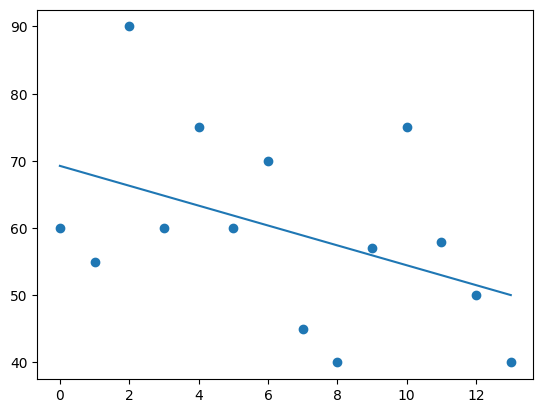

slope: -1.479120879120879
intercept: 69.25714285714287
p: 0.11857048828049385


In [16]:
create_results("season2022.csv")

Pro tuto sezonu je $p-hodnota$ moc veliká, takže nulovou hypotézu zamítnout nemůžeme, i z explorační analýzy je patrné, že vývoj střeleb v průběhu sezony není lineární

# Sezona 2023

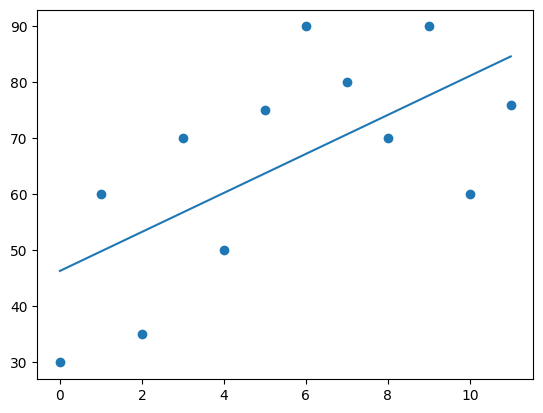

slope: 3.4825174825174825
intercept: 46.34615384615385
p: 0.02296223707874723


In [17]:
create_results("season2023.csv")

Pro sezonu 2023 vyšla $p-hodnota$ $0.0229 $, tudíž nulovou hypotézu zamítnout můžeme, i z explorační analýzy je vidět, že v průběhu sezony se až na občasné výkyvy úspěšnost střelby
zvyšuje lineárně

# Sezona 2024

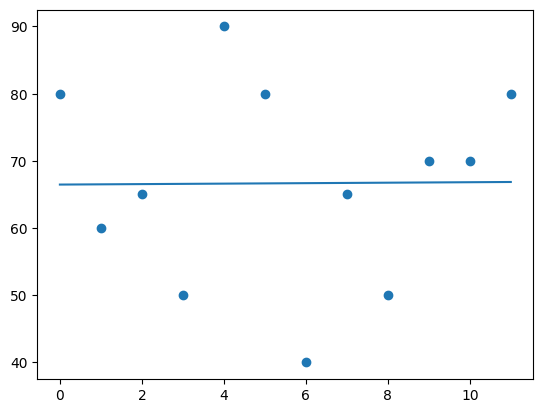

slope: 0.03496503496503492
intercept: 66.47435897435898
p: 0.9790708155947416


In [18]:
create_results("season2024.csv")

Pro sezonu 2024 je opět $ p-hodnota$ moc veliká, takže nulovou hypotézu zamítnout nemůžeme, toto je opět patrné i z explorační analýzy.

# Sezona 2025

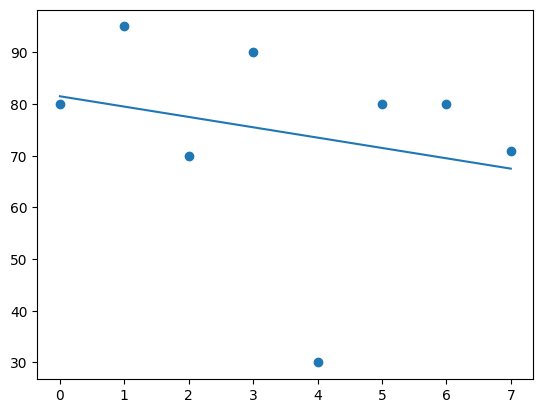

slope: -2.0
intercept: 81.5
p: 0.5561290851818046


In [19]:
create_results("season2025.csv")

Pro sezonu 2025 to může sice z explorační analýzy vypadat, jako že by se výsledky střeleb daly modelovat lineární regresí, a že v průběhu sezony úspěšnost mírně klesala, ale
$p-hodnota$ je opět moc veliká, takže nulovou hypotézu zamítnout nemůžeme.

## Shrnutí

Celkově lze vidět, že pouze v jedné sezoně by se dala postupná úspěšnost střelby v sezoně modelovat lineární regresí, kde v dané sezoně úspěšnost pořád stoupala. V ostatních sezonách
byla úspěšnost střelby na modelování lineární regresí moc nevyrovnaná

# Modelování úspěšnosti náhodné střelby normálním rozdělením

V tomto testu bych chtěl zkoumat, jestli lze modelovat úspěšnost náhodně vybrané střelby normálním rozdělením se střední hodnotou $75 \%$, Nulová hypotéza je, že střední hodnota této
náhodné veličiny je $75 \%$ úspěšnosti. Alternativní hypotéza je, že opravdová střední hodnota je větší než $75 \%$ úspěšnosti. K testování budu používat jednostranný t-test. Hladina významnosti je $\alpha = 0,05$

# Explorační analýza

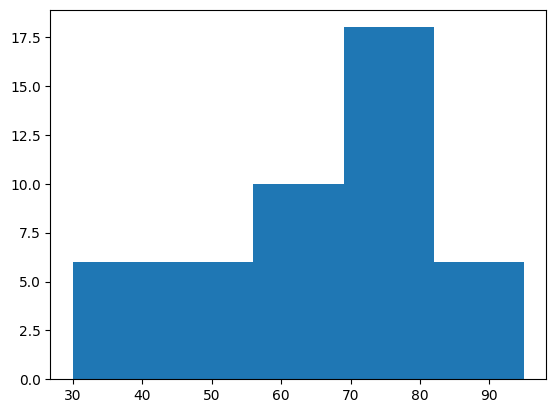

In [20]:
import matplotlib.pyplot as plt
from scipy import stats


# Načtení dat
ttest_data = []
for i in range(2, 6):
	path = f"./season202{i}.csv"
	csv_reader = CSVReader(path)
	int_result = csv_reader.get_values()

	for row in int_result:
		ttest_data.append(row)

plt.hist(ttest_data, bins=5)
plt.show()

Z explorační analýzy to vypadá, že jednostranně by výsledky střeleb mohly být normálně rozdělené se střední hodnotou $75 \%$

Výpočet:

In [21]:
result = stats.ttest_1samp(ttest_data, 75, alternative='greater')


print(f'statistic: {result.statistic}')
print(f'p: {result.pvalue}')

statistic: -3.7447725186548997
p: 0.9997445350971096


Z testu vyšla $p-hodnota$ $0,9997$, takže nulovou hypotézu odmítnout nemůžeme.